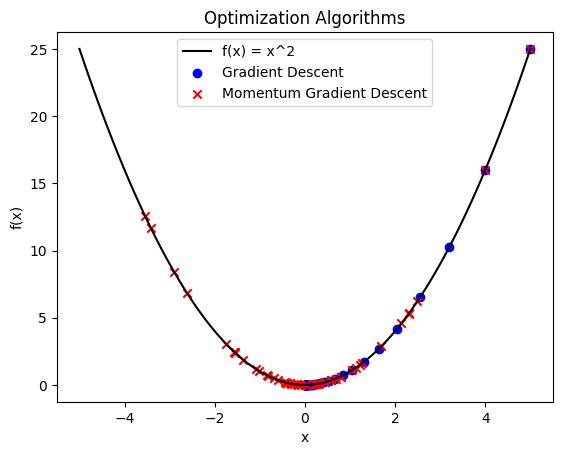

In [1]:
#4a
''' 
Aim: Implement basic optimization algorithms like gradient descent and
momentum.

Gradient descent: It calculates the gradient (partial derivative) of the loss function with
respect to each parameter and updates the parameters in the opposite direction of the
gradient.

Momentum:Accelerate gradient descent by incorporating previous gradients to smooth out
updates and avoid oscillations.
Momentum accumulates a moving average of gradients to update
parameters, reducing noise and speeding convergence.
'''

import numpy as np
import matplotlib.pyplot as plt

# Function to minimize: f(x) = x2
# Gradient: f'(x) = 2x
def function(x):
    return x ** 2

def gradient(x):
    return 2 * x

# Gradient Descent Algorithm
def gradient_descent(learning_rate=0.1, iterations=50):
    x = 5 # Starting point
    history = [x]
    for _ in range(iterations):
        x -= learning_rate * gradient(x)
        history.append(x)
    return history

# Momentum-based Gradient Descent Algorithm
def momentum_gradient_descent(learning_rate=0.1, momentum=0.9, iterations=50):
    x = 5 # Starting point
    velocity = 0
    history = [x]
    for _ in range(iterations):
        velocity = momentum * velocity - learning_rate * gradient(x)
        x += velocity
        history.append(x)
    return history

# Run optimizers
gd_history = gradient_descent()
mgd_history = momentum_gradient_descent()

# Plot results
x_vals = np.linspace(-5, 5, 100)
y_vals = function(x_vals)
plt.plot(x_vals, y_vals, label='f(x) = x^2', color='black')
plt.scatter(gd_history, [function(x) for x in gd_history], label='Gradient Descent', color='blue',marker='o')
plt.scatter(mgd_history, [function(x) for x in mgd_history], label='Momentum Gradient Descent', color='red', marker='x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Optimization Algorithms')
plt.show()

In [ ]:
#4b
''' 
Aim: Implement optimization strategies like stochastic gradient descent with
mini-batch updates.

Stochastic gradient is a variant of gradient descent where parameters are updated based on individual data
points rather than the entire dataset.

Mini-batch Gradient Descent:
It combines the benefits of both SGD and batch gradient descent.
The dataset is divided into small batches and the parameters are updated 
after each mini-batch.

Learning rate decides the step size for updating weights
'''

import torch #For working with tensors
import torch.nn as nn #Module for neural network layers, loss functions, and utilities to build DL models
import torch.optim as optim #Module contains optimizer for training models
import torchvision #Library for CV, pre-trained models, and datasets.
import torchvision.transforms as transforms #
from torch.utils.data import DataLoader

# Define a simple feedforward neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Hyperparameters
input_size = 28 * 28 # MNIST images are 28x28
hidden_size = 128
num_classes = 10
num_epochs = 5
batch_size = 64
learning_rate = 0.01

# Load MNIST dataset with transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Initialize model, loss function, and optimizer
model = NeuralNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Training loop with mini-batch SGD
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28 * 28) # Flatten images
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')
print('Training complete.')

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:15<00:00, 648668.09it/s] 


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 142677.42it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:10<00:00, 160415.03it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 2248645.98it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Epoch [1/5], Step [100/938], Loss: 0.3226
Epoch [1/5], Step [200/938], Loss: 0.5004
Epoch [1/5], Step [300/938], Loss: 0.6405
Epoch [1/5], Step [400/938], Loss: 0.2589
Epoch [1/5], Step [500/938], Loss: 0.3823
Epoch [1/5], Step [600/938], Loss: 0.2255
Epoch [1/5], Step [700/938], Loss: 0.2470
Epoch [1/5], Step [800/938], Loss: 0.1829
Epoch [1/5], Step [900/938], Loss: 0.0577
Epoch [2/5], Step [100/938], Loss: 0.1744
Epoch [2/5], Step [200/938], Loss: 0.1115
Epoch [2/5], Step [300/938], Loss: 0.1490
Epoch [2/5], Step [400/938], Loss: 0.1541
Epoch [2/5], Step [500/938], Loss: 0.0965
Epoch [2/5], Step [600/938], Loss: 0.0766
Epoch [2/5], Step [700/938], Loss: 0.2663
Epoch [2/5], Step [800/938], Loss: 0.1675
Epoch [2/5], Step [900/938], Loss: 0.1385
Epoch [3/5], Step [100/938], Loss: 0.0648
Epoch [3/5], Step [200/938], Loss: 0.0431
Epoch [3/5], Step [300/938], Loss: 0.1495
Epoch [3/5], Step [400/938], Loss: 0.3073
E